# Placeholder for Text

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, auc, roc_curve
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.10.0'

In [3]:
tf.keras.__version__

'2.10.0'

# Data

importing Jupyter notebook from Data_Cleaning.ipynb


<string>:6: DtypeWarning: Columns (18,19,22) have mixed types. Specify dtype option on import or set low_memory=False.


Number of data points: 396029

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396029 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396029 non-null  int64  
 1   term                  396029 non-null  object 
 2   int_rate              396029 non-null  float64
 3   installment           396029 non-null  float64
 4   emp_title             373102 non-null  object 
 5   emp_length            377728 non-null  object 
 6   home_ownership        396029 non-null  object 
 7   annual_inc            396029 non-null  float64
 8   verification_status   396029 non-null  object 
 9   issue_d               396029 non-null  object 
 10  loan_status           396029 non-null  object 
 11  purpose               396029 non-null  object 
 12  title                 394274 non-null  object 
 13  dti                   396029 non-null  float64
 14  earliest_cr_line     

term     pct
 36 months  302004  76.26%
 60 months   94025  23.74%

emp_title    pct
Teacher                       4389  1.18%
Manager                       4250  1.14%
Registered Nurse              1856  0.50%
RN                            1846  0.49%
Supervisor                    1830  0.49%
...                            ...    ...
Postman                          1  0.00%
McCarthy & Holthus, LLC          1  0.00%
jp flooring                      1  0.00%
Histology Technologist           1  0.00%
Gracon Services, Inc             1  0.00%

[173104 rows x 2 columns]

emp_length     pct
10+ years      126040  33.37%
2 years         35827   9.48%
< 1 year        31725   8.40%
3 years         31665   8.38%
5 years         26495   7.01%
1 year          25882   6.85%
4 years         23952   6.34%
6 years         20841   5.52%
7 years         20819   5.51%
8 years         19168   5.07%
9 years         15314   4.05%

home_ownership     pct
MORTGAGE          198347  50.08%
RENT              159790  40.35%
OWN                37746   9.53%
OTHER                112   0.03%
NONE                  31   0.01%
ANY                    3   0.00%

verification_status     pct
Verified                      139563  35.24%
Source Verified               131385  33.18%
Not Verified                  125081  31.58%

issue_d     pct
2014   102859  25.97%
2013    97662  24.66%
2015    94264  23.80%
2012    41202  10.40%
2016    28088   7.09%
2011    17435   4.40%
2010     9258   2.34%
2009     3826   0.97%
2008     1240   0.31%
2007      195   0.05%

loan_status     pct
Fully Paid        318357  80.39%
Charged Off        77672  19.61%

purpose     pct
debt_consolidation   234507  59.21%
credit_card           83019  20.96%
home_improvement      24029   6.07%
other                 21185   5.35%
major_purchase         8790   2.22%
small_business         5701   1.44%
car                    4697   1.19%
medical                4196   1.06%
moving                 2854   0.72%
vacation               2452   0.62%
house                  2201   0.56%
wedding                1812   0.46%
renewable_energy        329   0.08%
educational             257   0.06%

title     pct
Debt consolidation       152472  38.67%
Credit card refinancing   51487  13.06%
Home improvement          15264   3.87%
Other                     12930   3.28%
Debt Consolidation        11608   2.94%
...                         ...     ...
Daughter's Wedding Bill       1   0.00%
gotta move                    1   0.00%
creditcardrefi                1   0.00%
Debt/Home                     1   0.00%
Toxic Debt Payoff             1   0.00%

[48816 rows x 2 columns]

earliest_cr_line    pct
2000             29366  7.42%
2001             29083  7.34%
1999             26491  6.69%
2002             25901  6.54%
2003             23657  5.97%
...                ...    ...
1951                 3  0.00%
1950                 3  0.00%
1953                 2  0.00%
1944                 1  0.00%
1948                 1  0.00%

[65 rows x 2 columns]

initial_list_status     pct
f               238065  60.11%
w               157964  39.89%

application_type     pct
INDIVIDUAL            395318  99.82%
JOINT                    425   0.11%
DIRECT_PAY               286   0.07%

address    pct
AP    14308  3.61%
AE    14157  3.57%
AA    13919  3.51%
NJ     7091  1.79%
WI     7081  1.79%
LA     7068  1.78%
NV     7038  1.78%
AK     7034  1.78%
MA     7022  1.77%
VA     7022  1.77%
VT     7005  1.77%
NY     7004  1.77%
MS     7003  1.77%
TX     7000  1.77%
SC     6973  1.76%
ME     6972  1.76%
AR     6969  1.76%
OH     6969  1.76%
GA     6967  1.76%
ID     6958  1.76%
IN     6957  1.76%
KS     6945  1.75%
WV     6944  1.75%
RI     6940  1.75%
MO     6939  1.75%
IL     6934  1.75%
WY     6933  1.75%
NE     6927  1.75%
HI     6927  1.75%
IA     6926  1.75%
FL     6921  1.75%
AZ     6918  1.75%
CO     6914  1.75%
OK     6911  1.75%
CT     6904  1.74%
MN     6904  1.74%
NC     6901  1.74%
OR     6898  1.74%
CA     6898  1.74%
AL     6898  1.74%
MD     6896  1.74%
WA     6895  1.74%
UT     6887  1.74%
SD     6887  1.74%
MT     6883  1.74%
DE     6874  1.74%
TN     6869  1.73%
ND     6858  1.73%
MI     6854  1.73%
DC     6842  1.73%
NM     6842  1.73%
PA     6825  1.72%
NH     6818  1.72%
KY     6800  1.72%

loan_status     pct
0       318357  80.39%
1        77672  19.61%

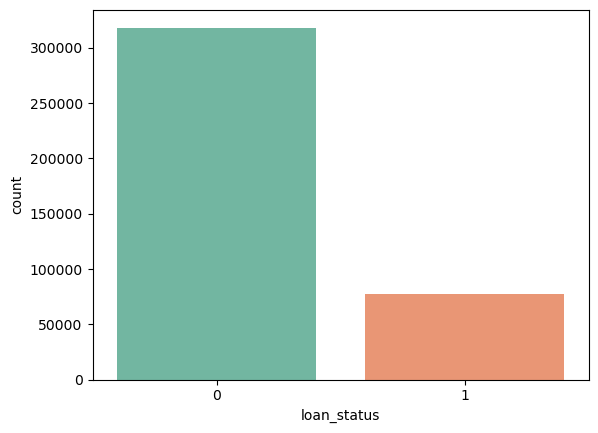

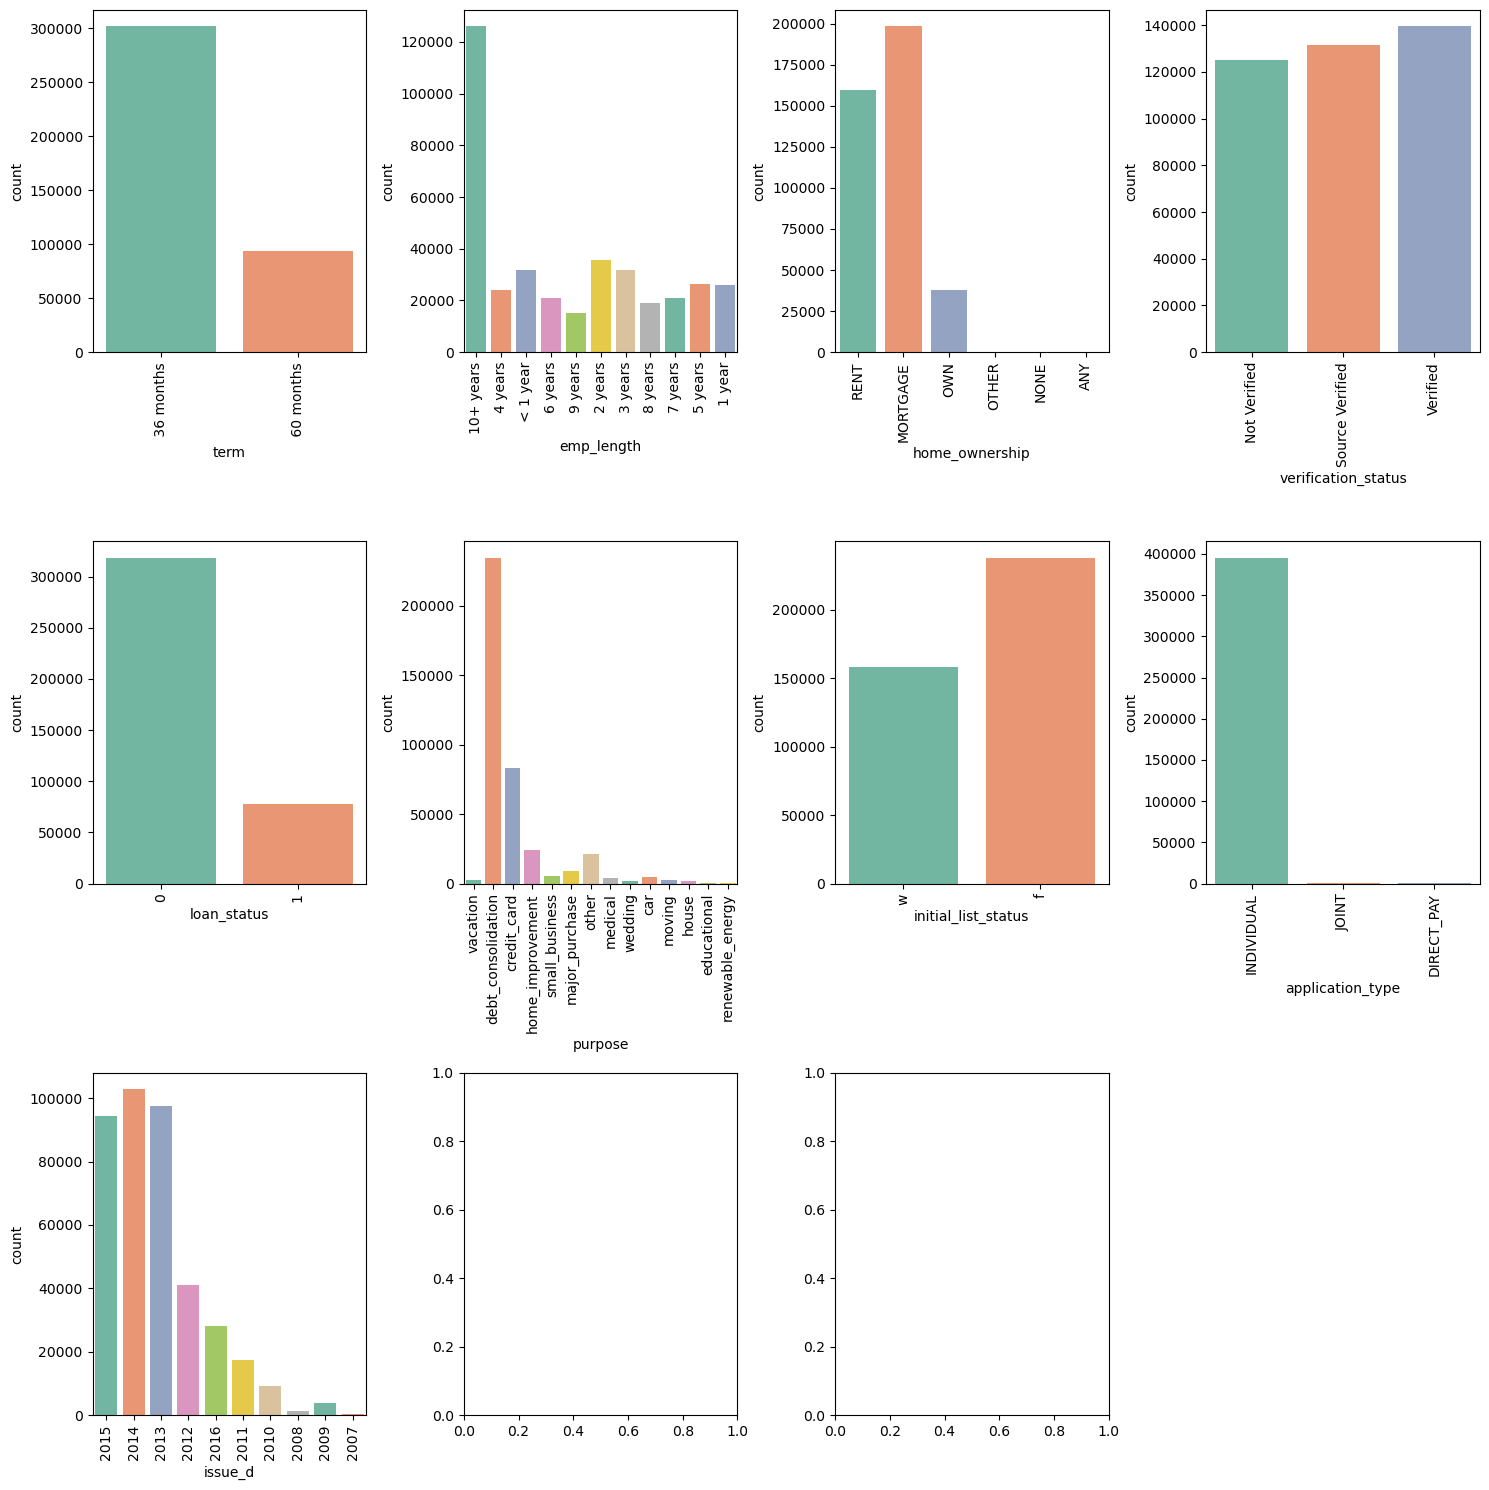

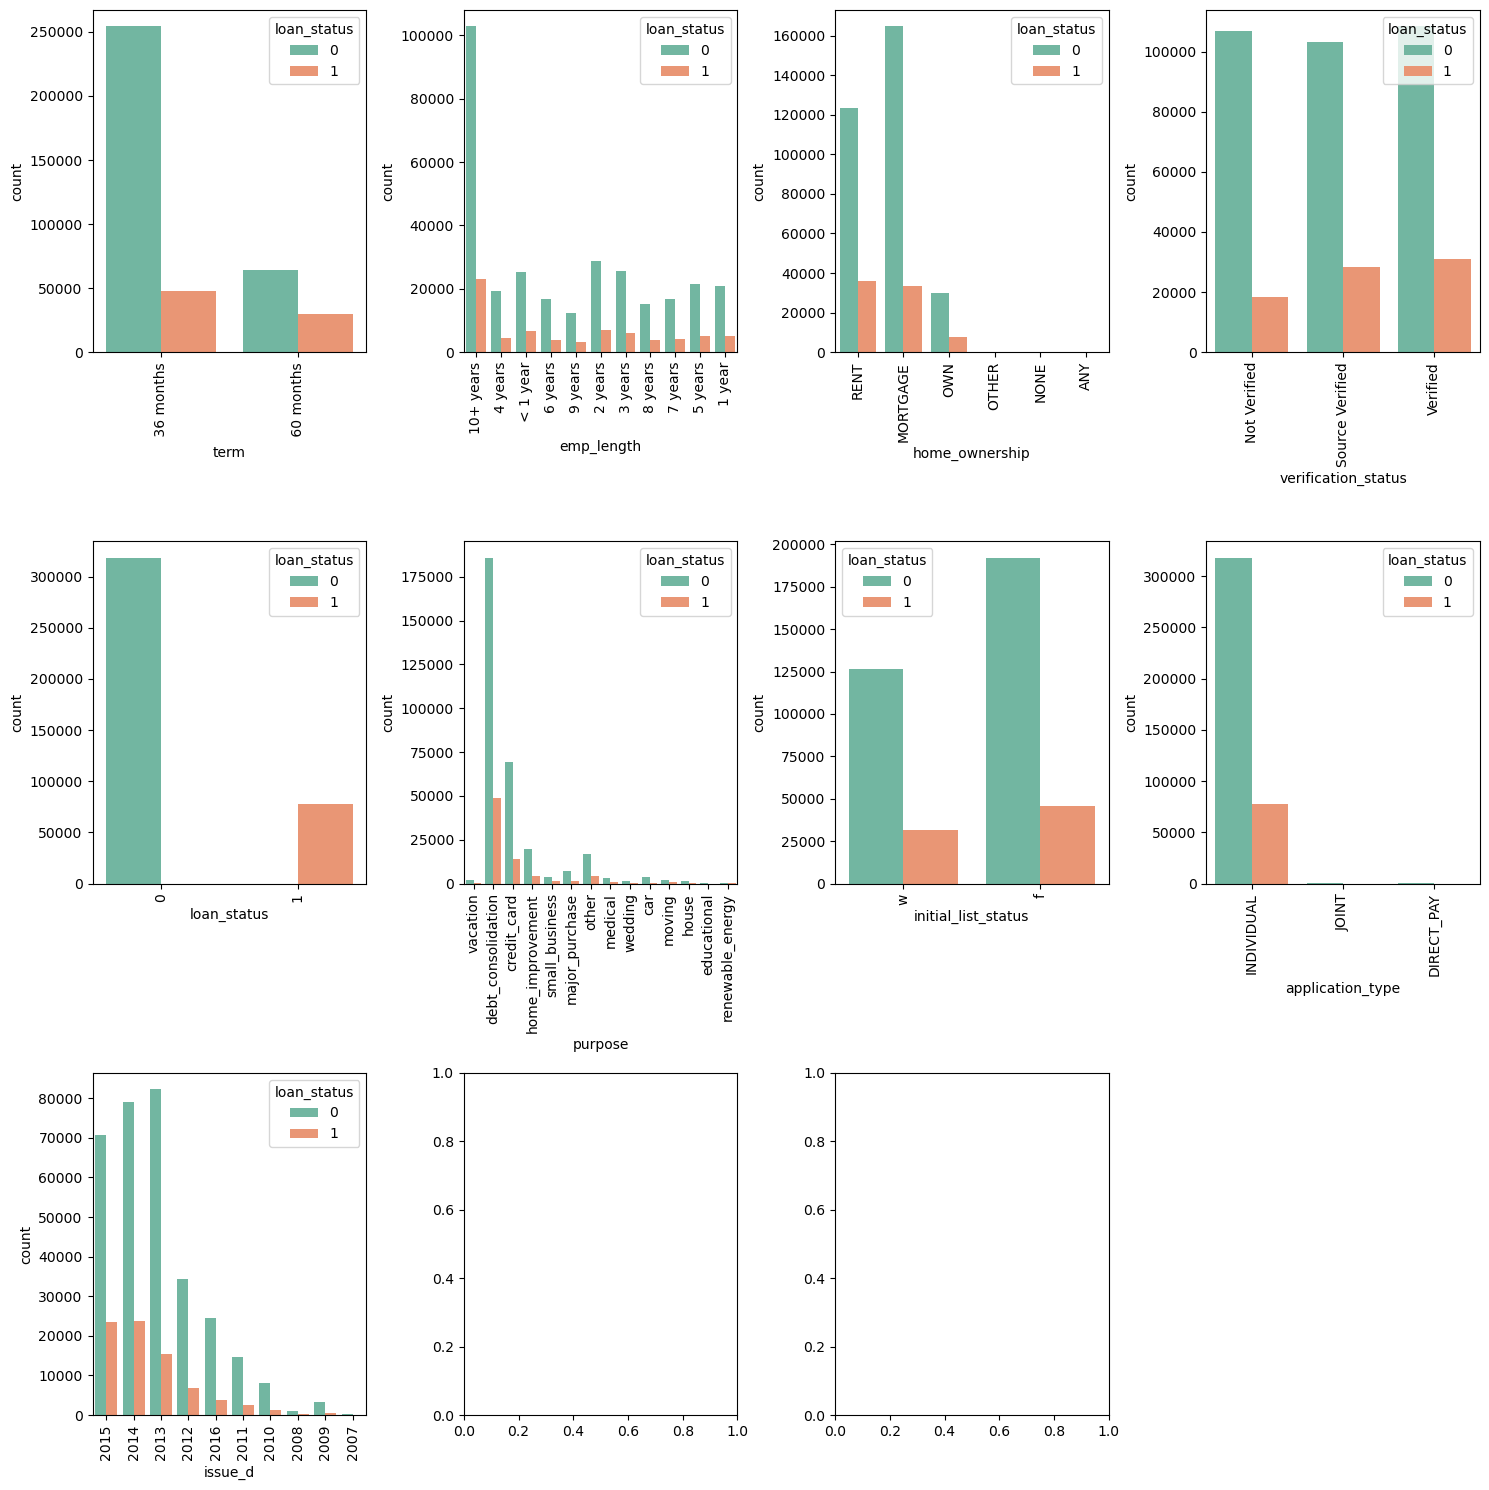

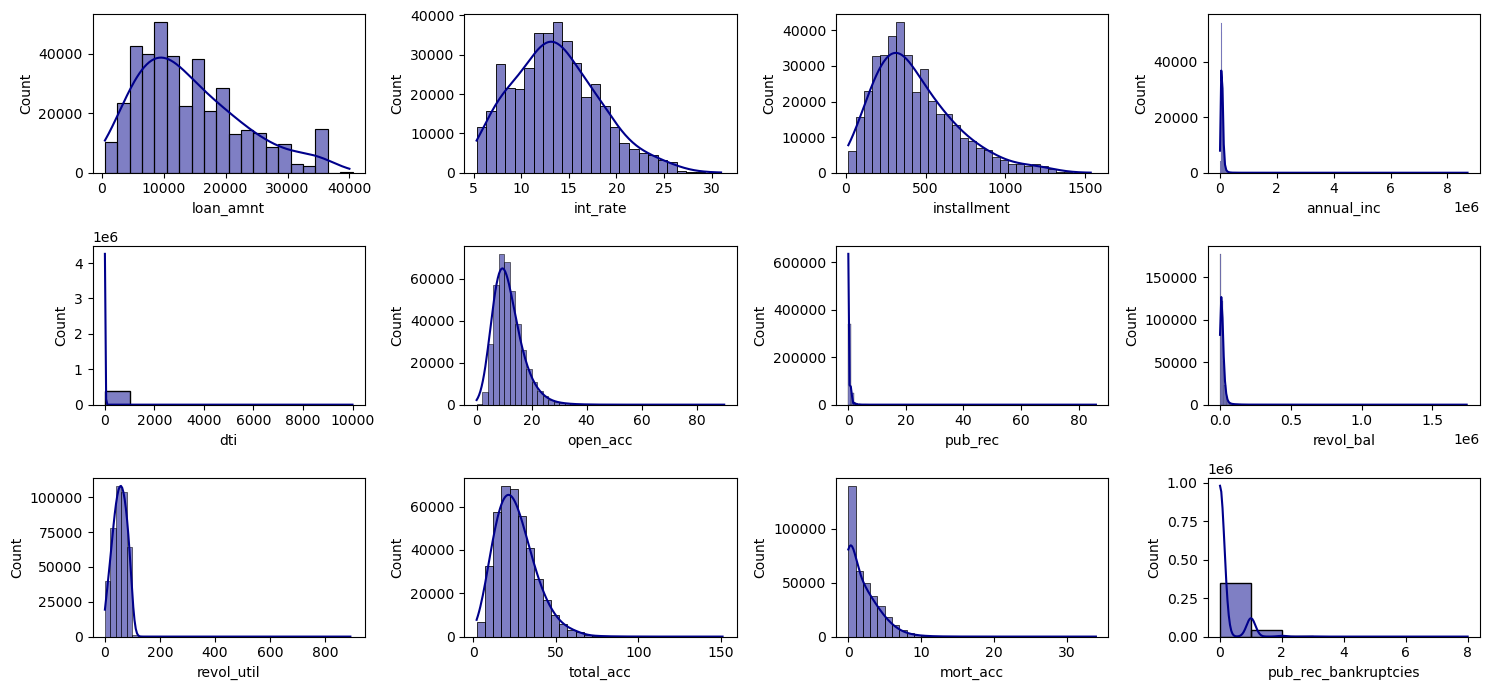

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your

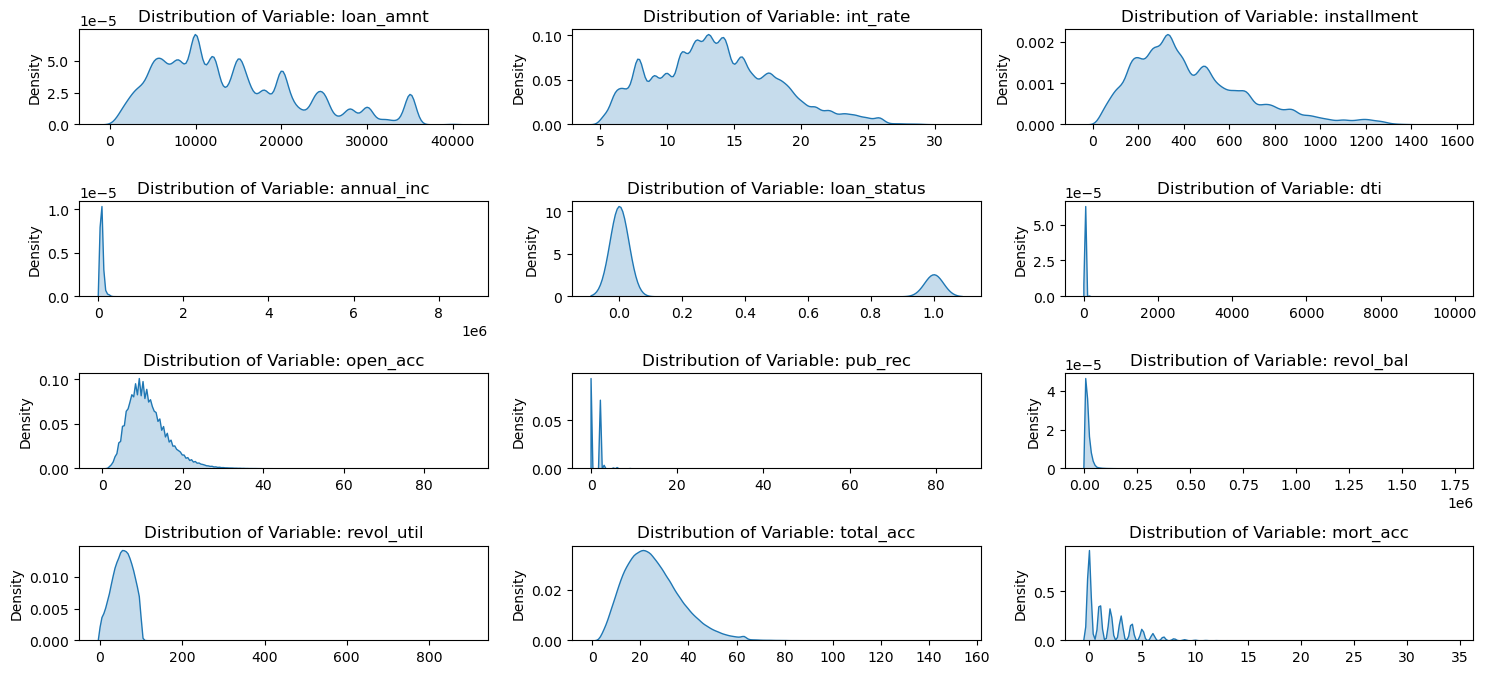

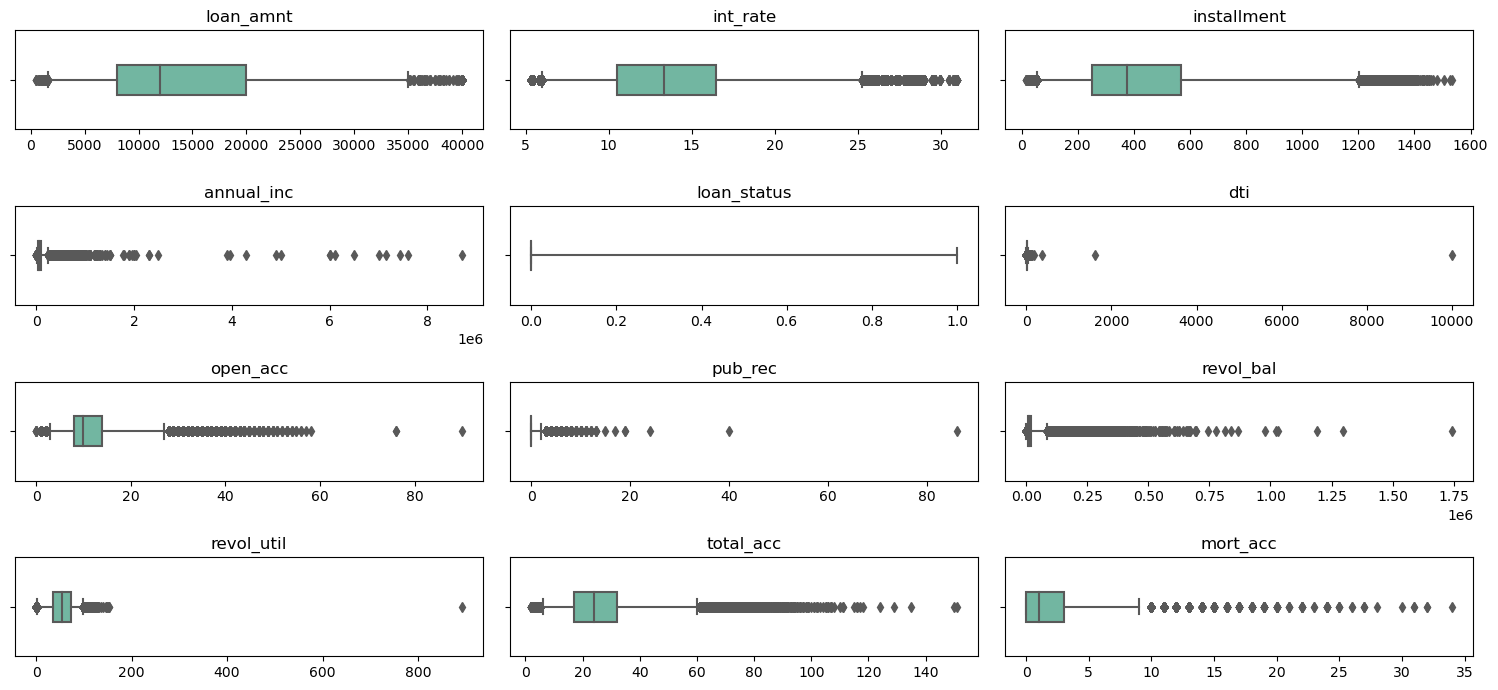

c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning

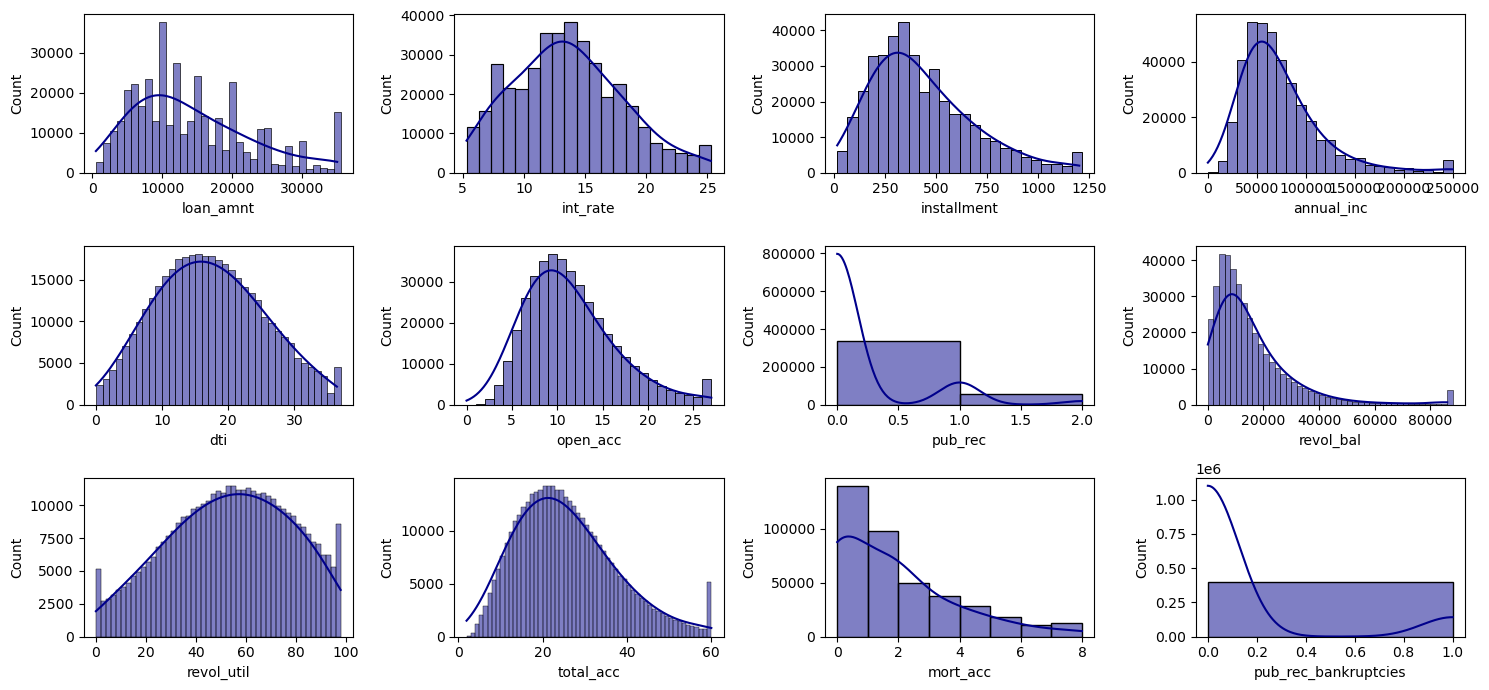

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your

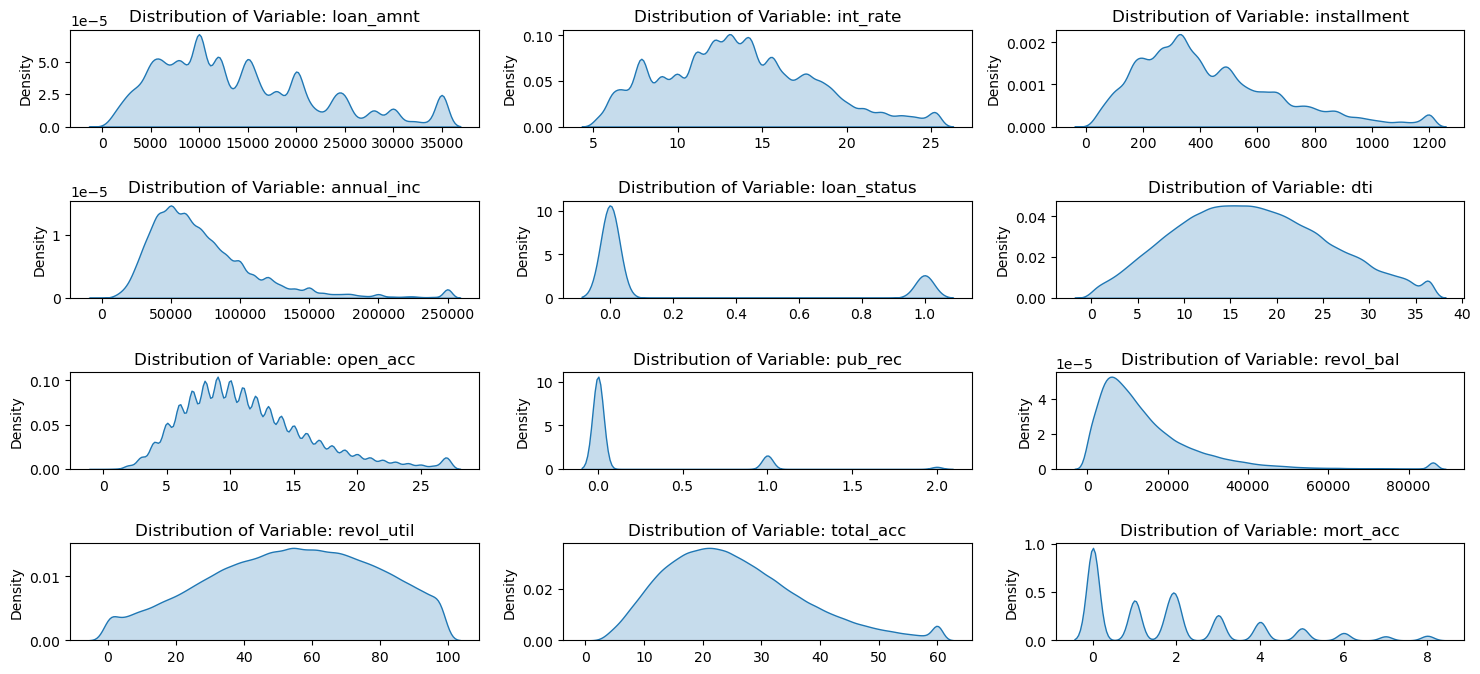


 loan_amnt :
25 percentile:  8000.0
75 percentile:  20000.0
IQR:  12000.0
Upper limit:  38000.0
Lower limit:  -10000.0

 int_rate :
25 percentile:  10.49
75 percentile:  16.49
IQR:  5.999999999999998
Upper limit:  25.489999999999995
Lower limit:  1.4900000000000038

 installment :
25 percentile:  250.33
75 percentile:  567.3
IQR:  316.9699999999999
Upper limit:  1042.7549999999999
Lower limit:  -225.12499999999986

 annual_inc :
25 percentile:  45000.0
75 percentile:  90000.0
IQR:  45000.0
Upper limit:  157500.0
Lower limit:  -22500.0

 dti :
25 percentile:  11.28
75 percentile:  22.98
IQR:  11.700000000000001
Upper limit:  40.53
Lower limit:  -6.270000000000001

 open_acc :
25 percentile:  8.0
75 percentile:  14.0
IQR:  6.0
Upper limit:  23.0
Lower limit:  -1.0

 pub_rec :
25 percentile:  0.0
75 percentile:  0.0
IQR:  0.0
Upper limit:  0.0
Lower limit:  0.0

 revol_bal :
25 percentile:  6025.0
75 percentile:  19620.0
IQR:  13595.0
Upper limit:  40012.5
Lower limit:  -14367.5

 revol_

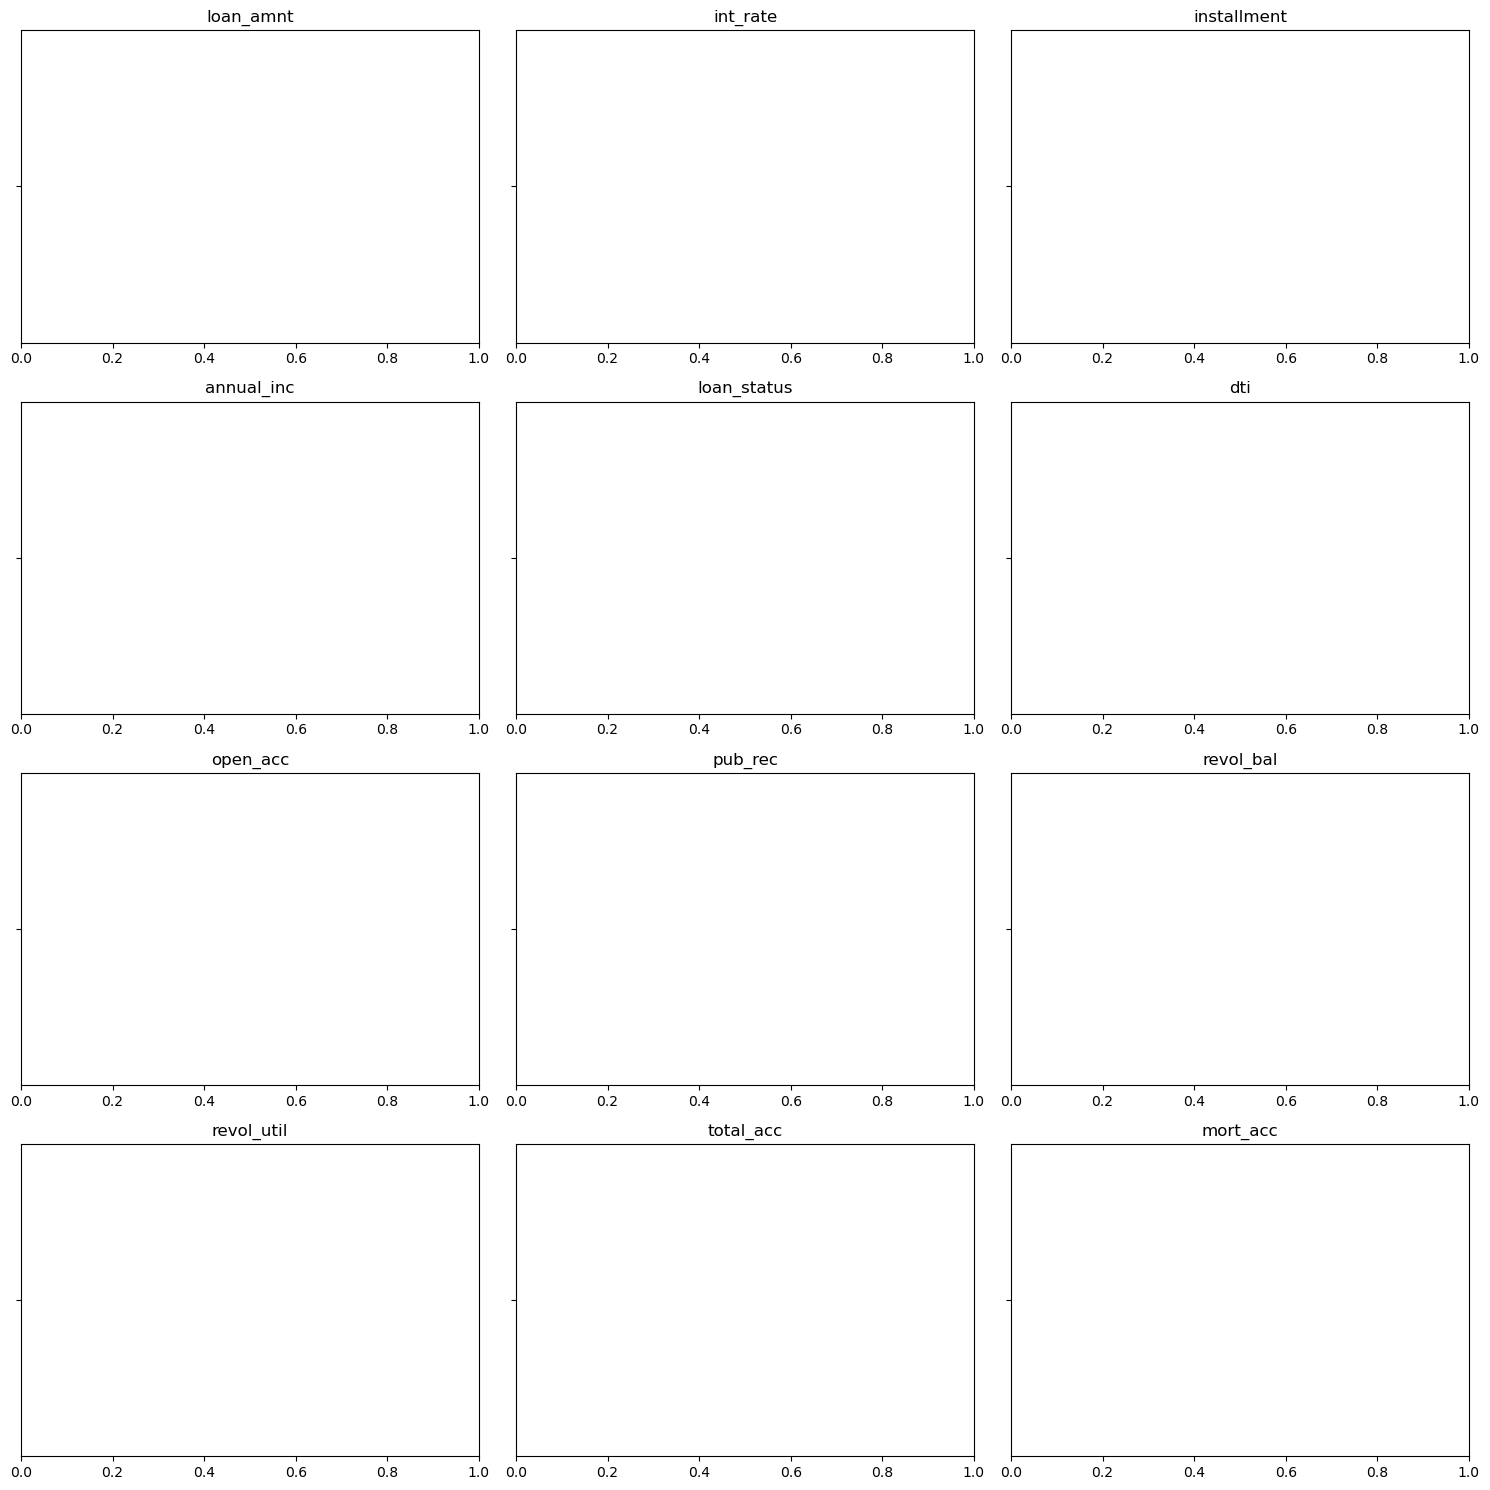


 loan_amnt :
99 percentile:  35000.0
01 percentile:  1600.0

 int_rate :
99 percentile:  25.28
01 percentile:  6.0

 installment :
99 percentile:  1202.3759999999916
01 percentile:  54.43

 annual_inc :
99 percentile:  250000.0
01 percentile:  19000.0

 dti :
99 percentile:  36.43
01 percentile:  1.56

 open_acc :
99 percentile:  27.0
01 percentile:  3.0

 pub_rec :
99 percentile:  2.0
01 percentile:  0.0

 revol_bal :
99 percentile:  86039.83999999939
01 percentile:  154.0

 revol_util :
99 percentile:  98.0
01 percentile:  1.02800000000002

 total_acc :
99 percentile:  60.0
01 percentile:  6.0

 mort_acc :
99 percentile:  8.0
01 percentile:  0.0

 pub_rec_bankruptcies :
99 percentile:  1.0
01 percentile:  0.0


Old Shape:  (396029, 21)
New Shape:  (308039, 21)
Size difference:  87990


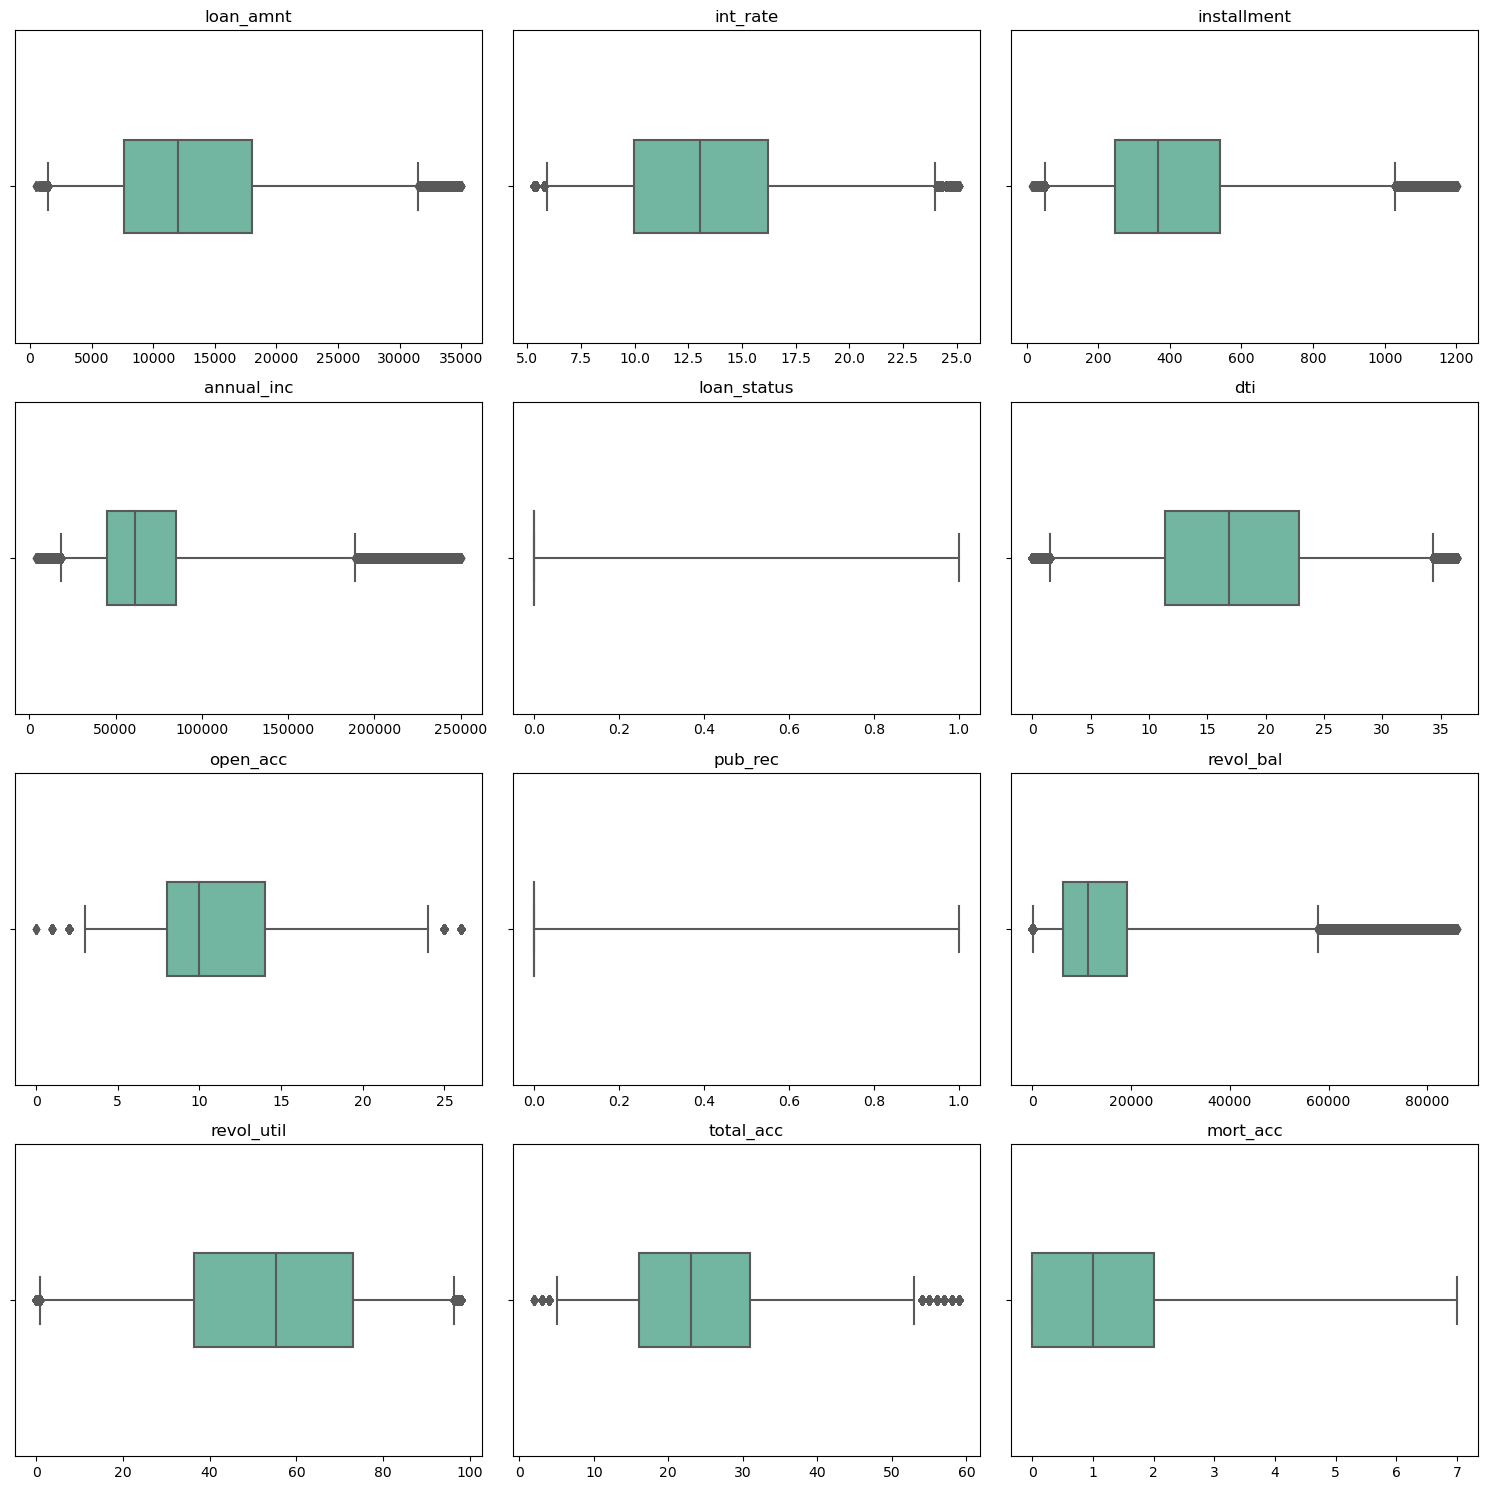

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your

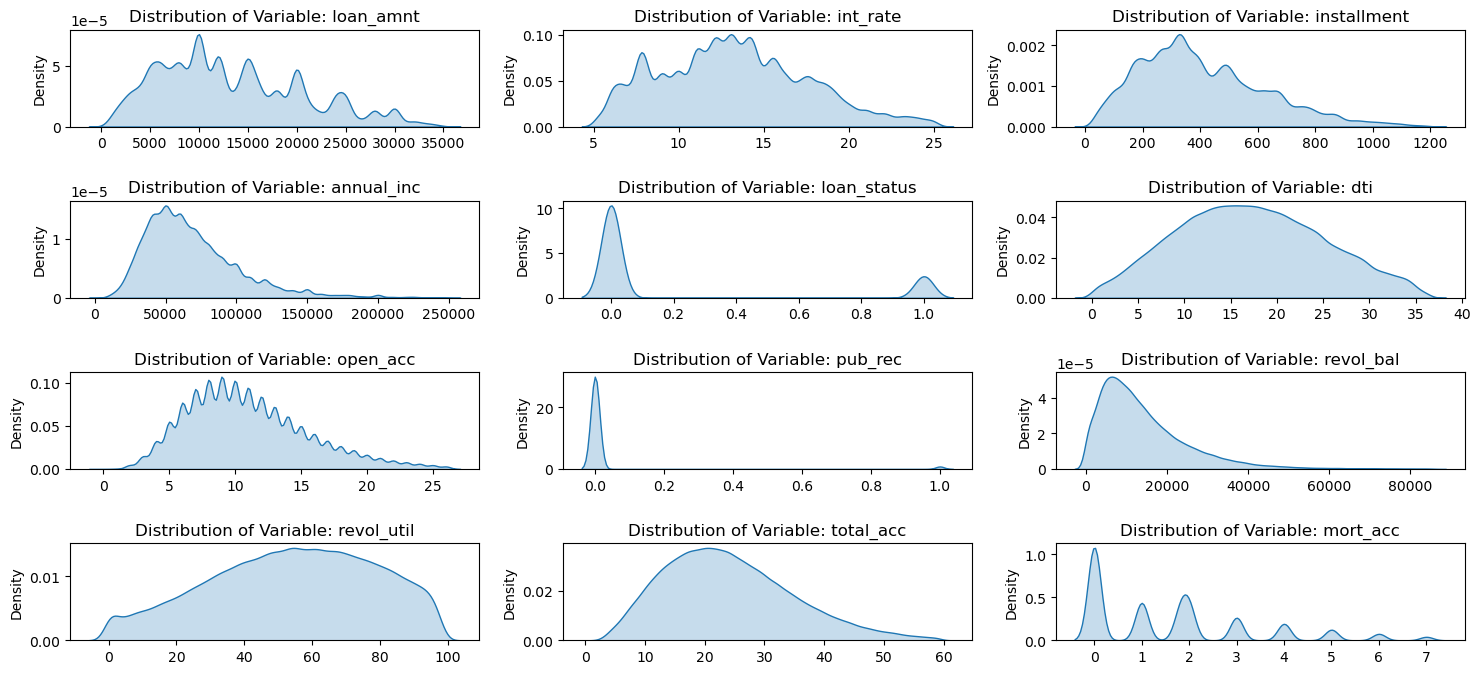

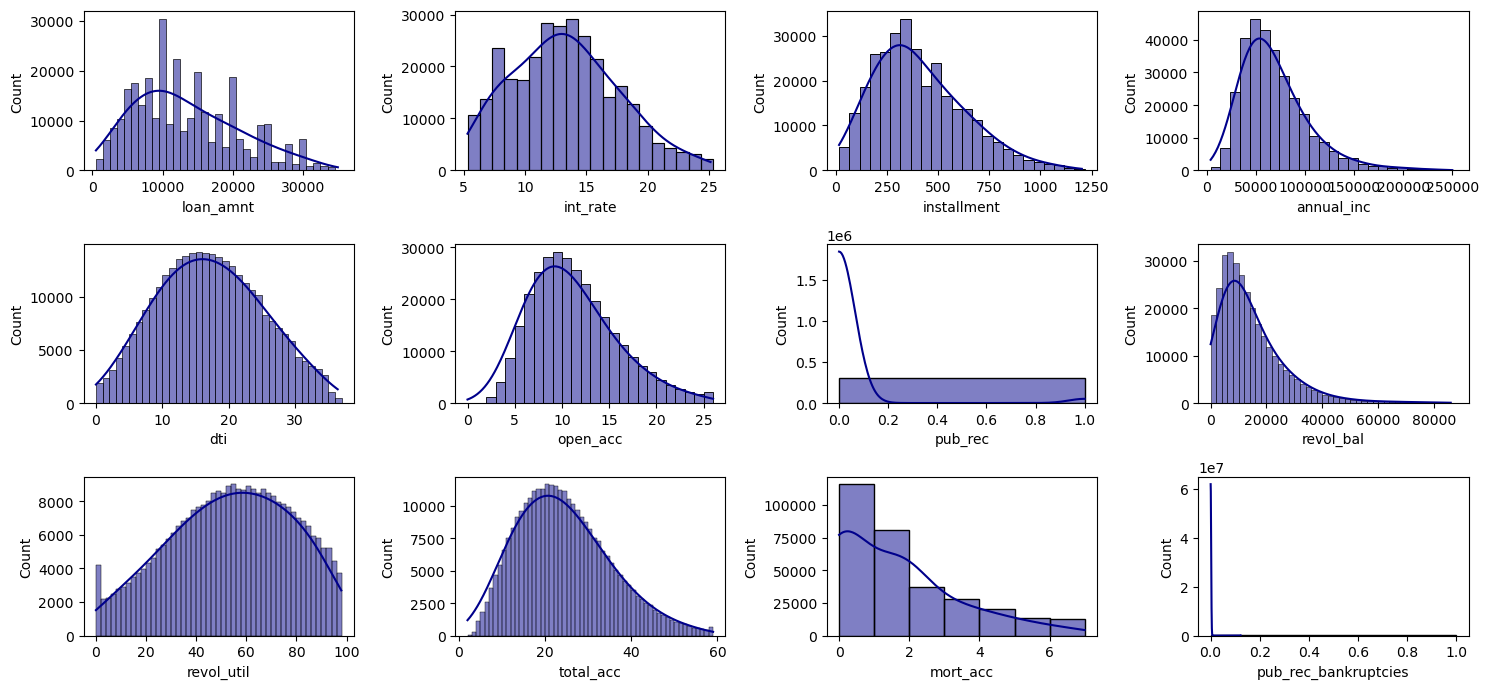

[1, 4, 5, 7, 8, 10, 17, 18]

['term',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'initial_list_status',
 'application_type']

['ohe__term_ 60 months',
 'ohe__home_ownership_RENT',
 'ohe__initial_list_status_w',
 'remainder__installment']

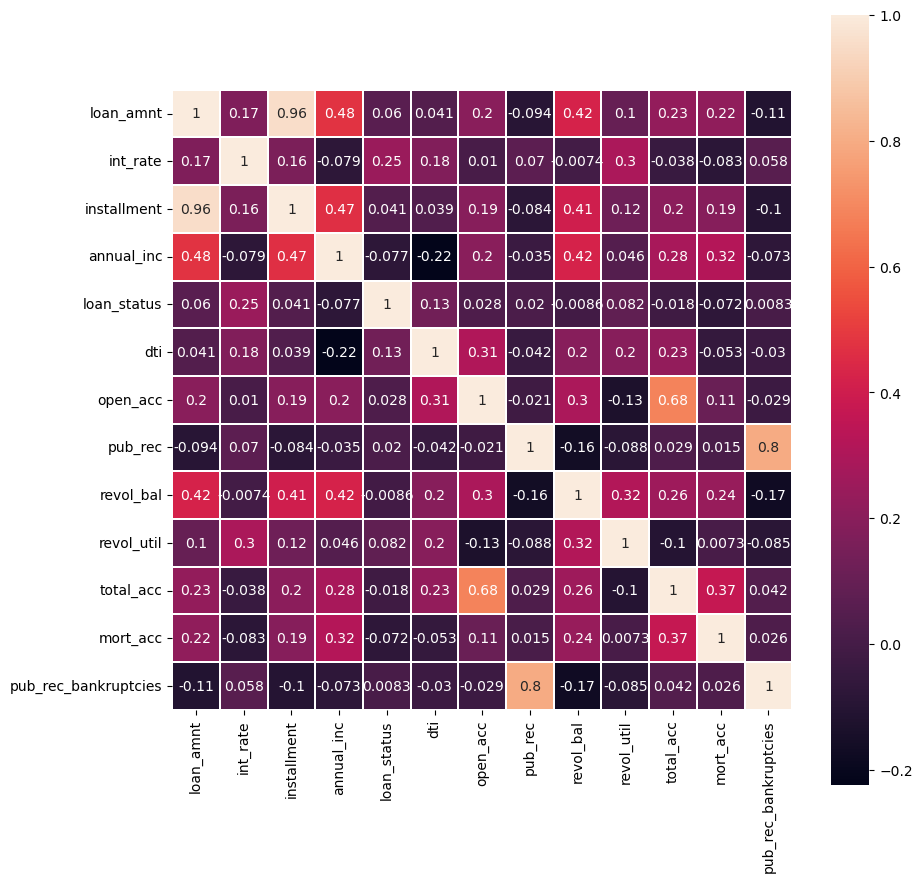

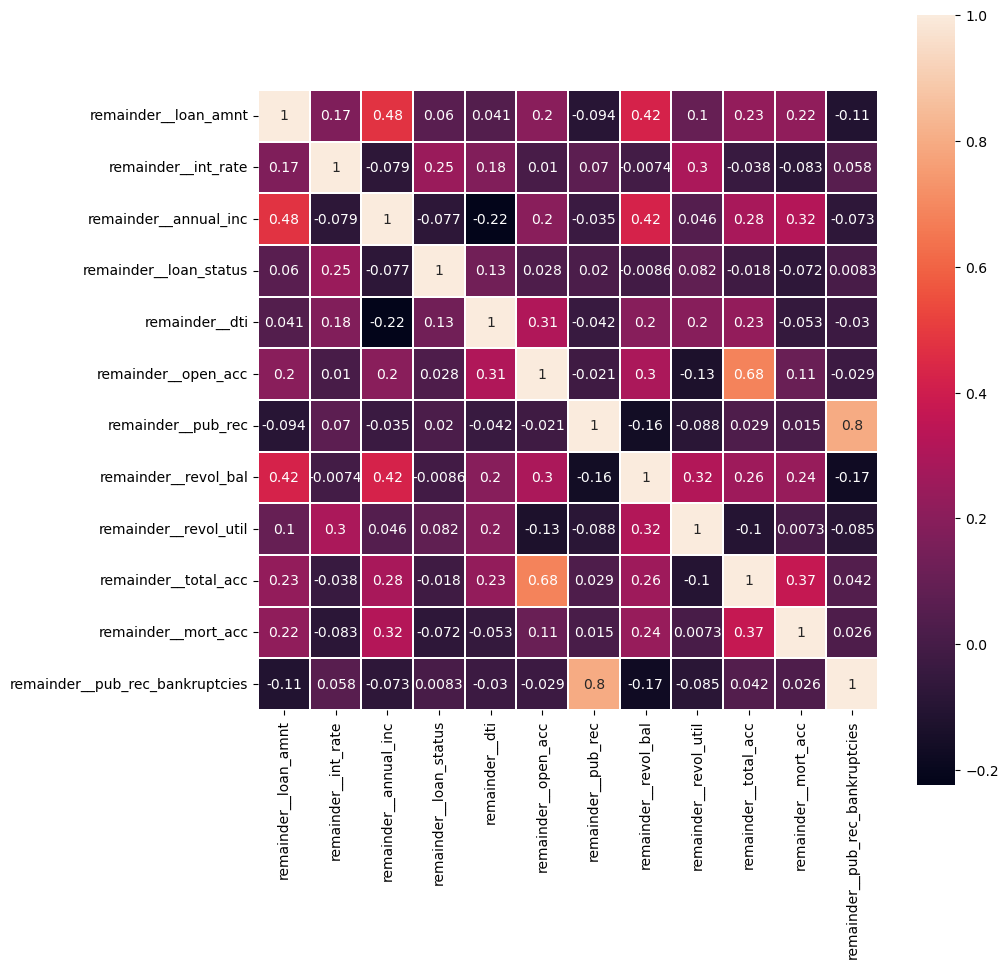

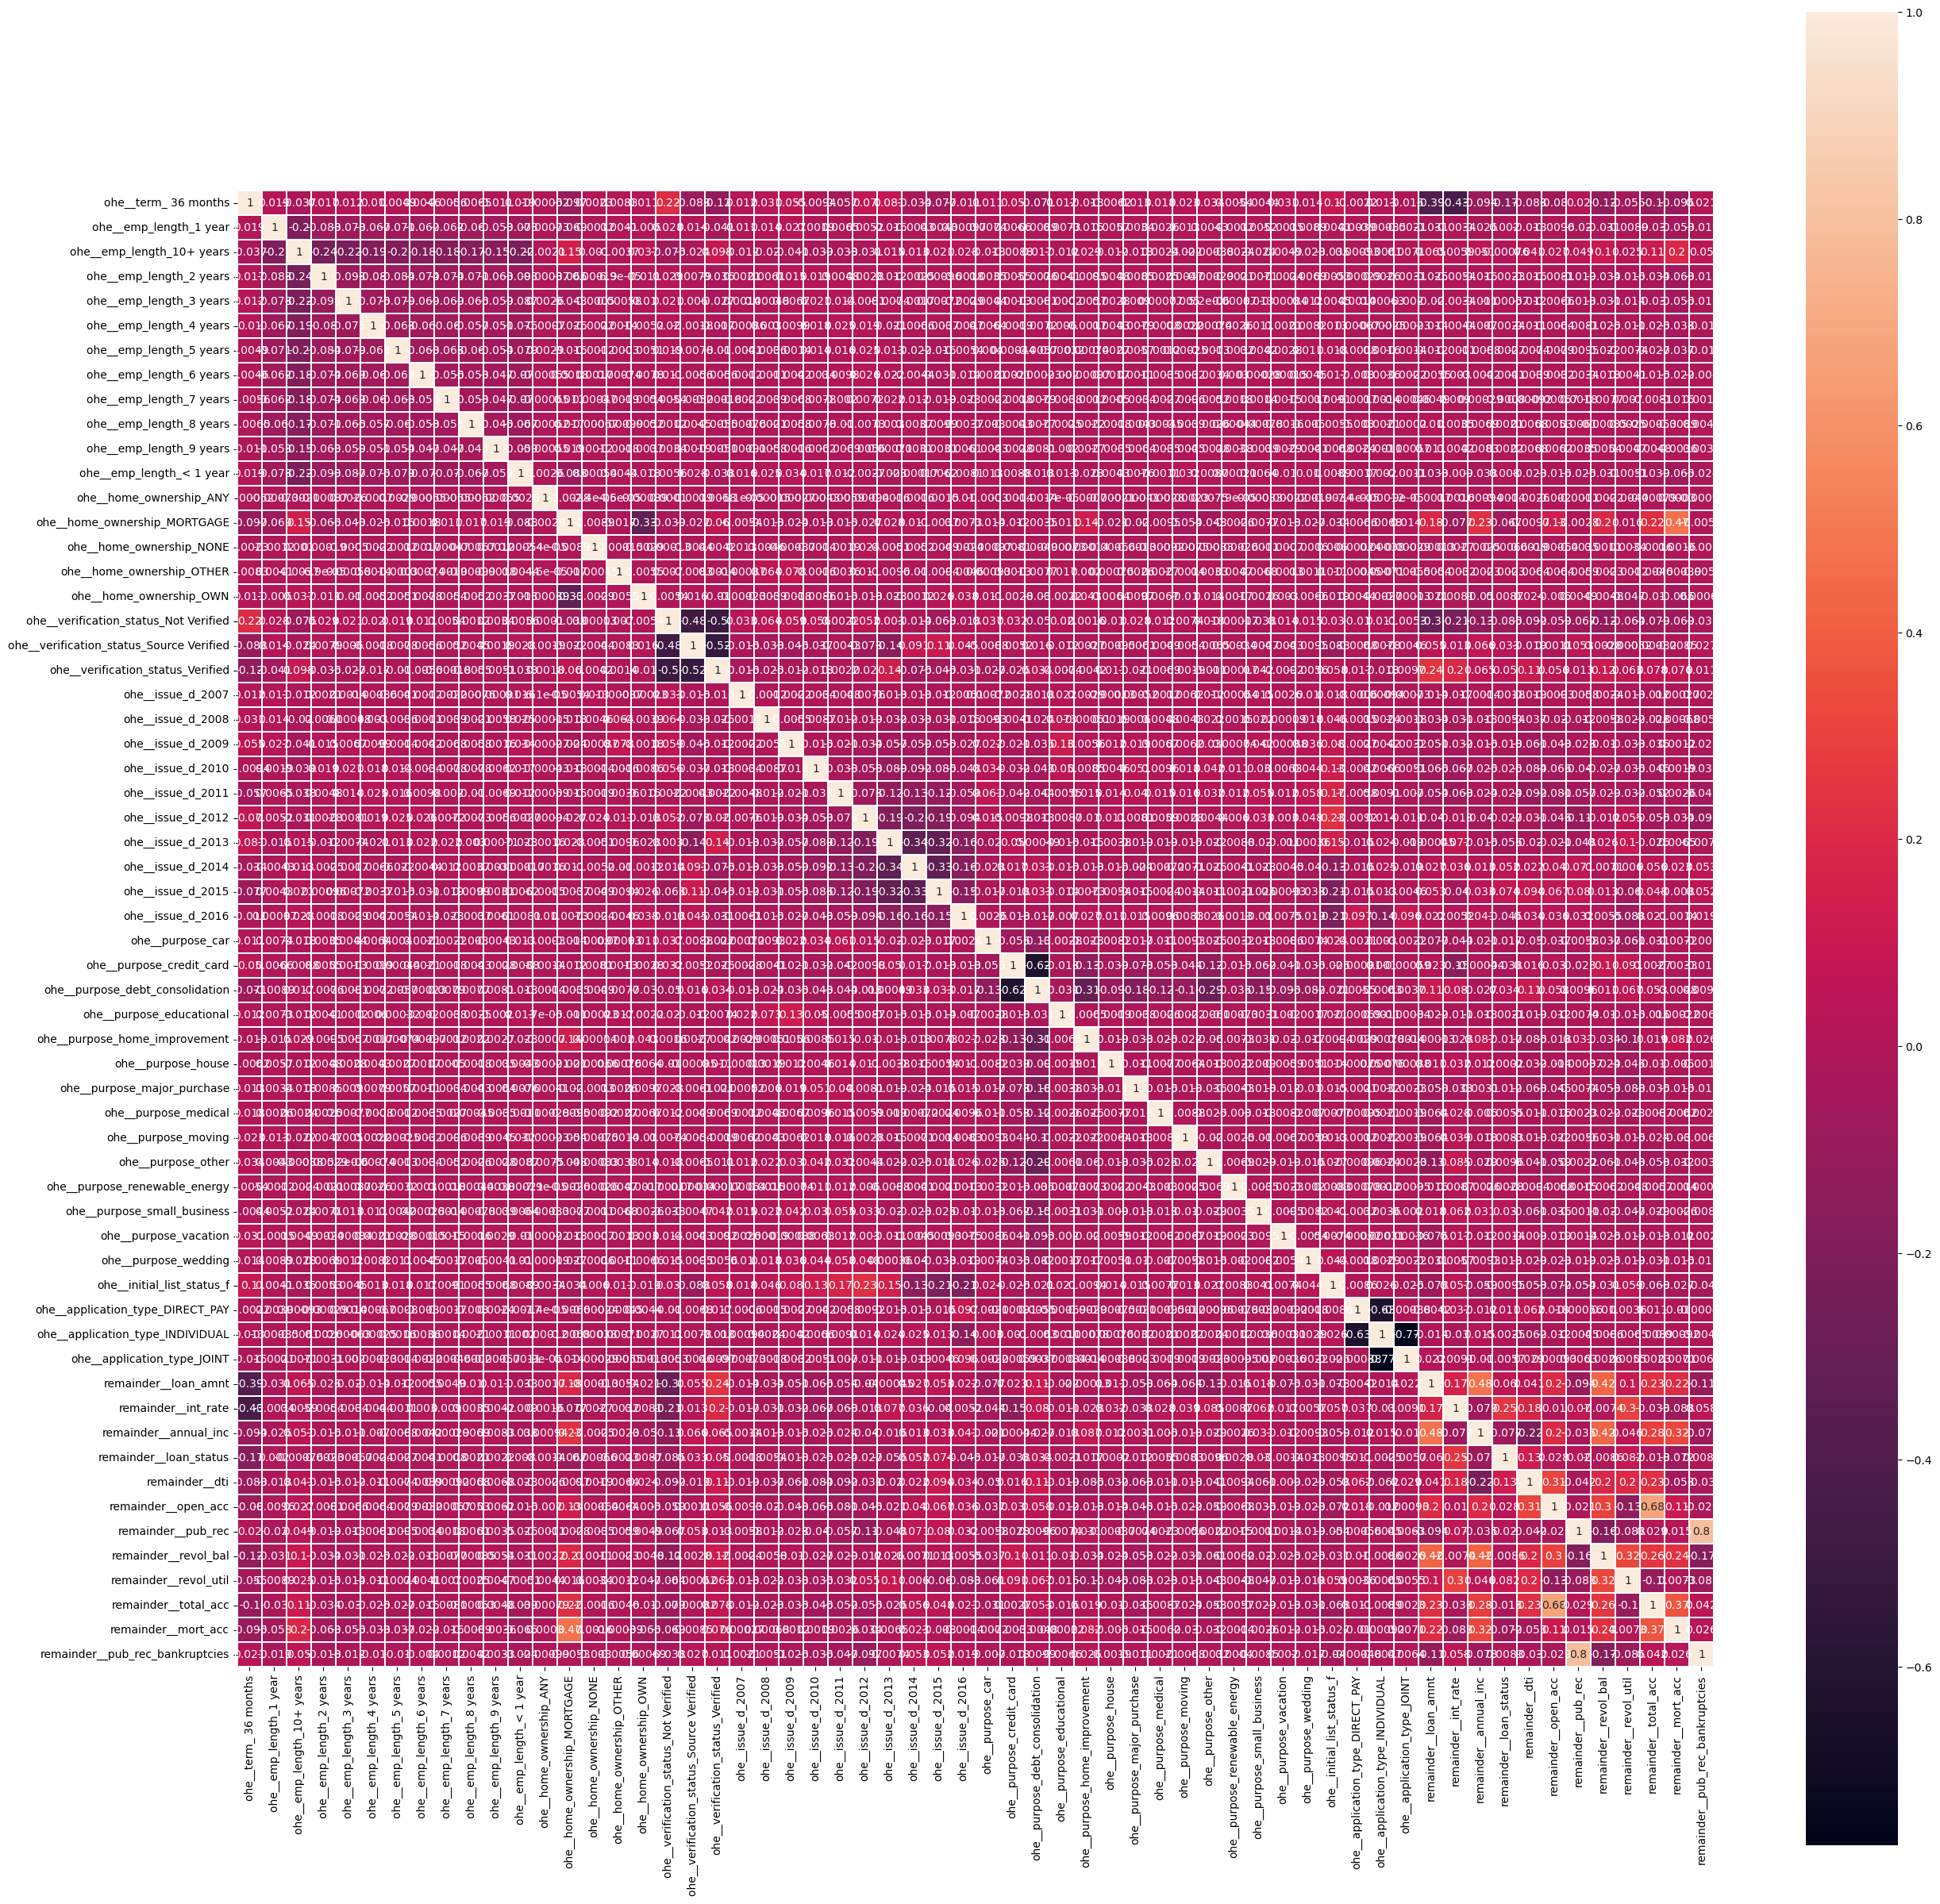

In [2]:
# pip install import_ipynb
import import_ipynb
from Data_Cleaning import data_final_scaled

#import Data_Cleaning as data_cleaned



In [3]:
# Get dataset fromm Data_cleaning
#data = data_cleaned.data_final_scaled

data = data_final_scaled


### Datasets
# data_final            -> not normalized, not standardized
# data_final_scaled     -> normalized
# data_final_scaled_std -> normalized, standardized


In [4]:
data

ohe__term_ 36 months  ohe__emp_length_1 year  \
0                       1.00                    0.00   
1                       1.00                    0.00   
2                       1.00                    0.00   
3                       1.00                    0.00   
4                       0.00                    0.00   
...                      ...                     ...   
396024                  0.00                    0.00   
396025                  1.00                    0.00   
396026                  1.00                    0.00   
396027                  0.00                    0.00   
396028                  1.00                    0.00   

        ohe__emp_length_10+ years  ohe__emp_length_2 years  \
0                            1.00                     0.00   
1                            0.00                     0.00   
2                            0.00                     0.00   
3                            0.00                     0.00   
4                            0.00                     0.00   
...                           ...                      ...   
396024                       0.00                     1.00   
396025                       0.00                     0.00   
396026                       1.00                     0.00   
396027                       1.00                     0.00   
396028                       1.00                     0.00   

        ohe__emp_length_3 years  ohe__emp_length_4 years  \
0                          0.00                     0.00   
1                          0.00                     1.00   
2                          0.00                     0.00   
3                          0.00                     0.00   
4                          0.00                     0.00   
...                         ...                      ...   
396024                     0.00                     0.00   
396025                     0.00                     0.00   
396026                     0.00                     0.00   
396027                     0.00                     0.00   
396028                     0.00                     0.00   

        ohe__emp_length_5 years  ohe__emp_length_6 years  \
0                          0.00                     0.00   
1                          0.00                     0.00   
2                          0.00                     0.00   
3                          0.00                     1.00   
4                          0.00                     0.00   
...                         ...                      ...   
396024                     0.00                     0.00   
396025                     1.00                     0.00   
396026                     0.00                     0.00   
396027                     0.00                     0.00   
396028                     0.00                     0.00   

        ohe__emp_length_7 years  ohe__emp_length_8 years  \
0                          0.00                     0.00   
1                          0.00                     0.00   
2                          0.00                     0.00   
3                          0.00                     0.00   
4                          0.00                     0.00   
...                         ...                      ...   
396024                     0.00                     0.00   
396025                     0.00                     0.00   
396026                     0.00                     0.00   
396027                     0.00                     0.00   
396028                     0.00                     0.00   

        ohe__emp_length_9 years  ohe__emp_length_< 1 year  \
0                          0.00                      0.00   
1                          0.00                      0.00   
2                          0.00                      1.00   
3                          0.00                      0.00   
4                          1.00                      0.00   
...                         ...                       ...   


In [5]:
# default/non-default ratio
value_count = data["remainder__loan_status"].value_counts().to_frame()
value_count["pct"] =  value_count["remainder__loan_status"] / value_count["remainder__loan_status"].sum()
value_count

remainder__loan_status  pct
0.00                  318357 0.80
1.00                   77672 0.20

In [6]:
# Defining the datasets
y = data["remainder__loan_status"]
X = data.drop("remainder__loan_status", axis=1)



In [7]:
# train/test split & keeping defualt/non-default ratio in both datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Training set size:', len(X_train))
print('Testing set size:', len(X_test))
print('Number of variables:', X_train.shape[1])

vc_train = Y_train.value_counts().to_frame()
vc_train["pct"] =  vc_train["remainder__loan_status"] / vc_train["remainder__loan_status"].sum()
display(vc_train)

vc_test = Y_test.value_counts().to_frame()
vc_test["pct"] =  vc_test["remainder__loan_status"] / vc_test["remainder__loan_status"].sum()
display(vc_test)

# StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains 
# approximately the same percentage of samples of each target class as the complete set.
# keep the proportion of y values through the training and test sets, then pass stratify=y -> else we have imbalanced datasets

Training set size: 316823
Testing set size: 79206
Number of variables: 59


remainder__loan_status  pct
0.00                  254685 0.80
1.00                   62138 0.20

remainder__loan_status  pct
0.00                   63672 0.80
1.00                   15534 0.20

In [11]:
# train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# print('Training set size:', len(train_set))
# print('Testing set size:', len(test_set))

In [12]:
# #Defining the datasets
# Y_train = train_set["remainder__loan_status"]
# X_train = train_set.drop("remainder__loan_status", axis=1)
# Y_test = test_set["remainder__loan_status"]
# X_test = test_set.drop("remainder__loan_status", axis=1)

## Models (Remo)

In [12]:
# Basic Model
model1 = keras.models.Sequential([
    #Input Layer (182 features)
    keras.layers.Dense(256, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(128, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(32, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation="sigmoid") #1 neuron because binary
])

In [13]:
# Model with regularizers and Dropout layers
model2 = keras.models.Sequential([
    #Input Layer (182 features)
    keras.layers.Dense(182, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid") #1 neuron because binary
])

In [ ]:
# inputs = Input(shape=(182,))

# #First Layer
# x = keras.layers.Dense(8, activation='relu')(inputs)

# #Split Second Layer in Branches
# x1 = keras.layers.Dense(4, activation='relu')(x)
# x2 = keras.layers.Dense(4, activation='relu')(x)

# #Combine
# x = keras.layers.concatenate([x1, x2])

# #Output Layer
# outputs = keras.layers.Dense(1, activation='sigmoid')(x)

# model4 = keras.models.Model(inputs=inputs, outputs=outputs)

In [14]:
model1.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01), # 0.01 < 0.02 
              metrics=["accuracy"])

# Hyperparameter tuning for learning rate?

In [15]:
model2.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

In [16]:
model1.fit(X_train, Y_train, batch_size=100, epochs=5, 
                    validation_data=(X_test, Y_test))

# best with data_final_scaled

Epoch 1/5
3169/3169 [==============================] - 9s 3ms/step - loss: 0.4615 - accuracy: 0.8044 - val_loss: 0.4522 - val_accuracy: 0.8051
Epoch 2/5
3169/3169 [==============================] - 11s 3ms/step - loss: 0.4493 - accuracy: 0.8063 - val_loss: 0.4494 - val_accuracy: 0.8065
Epoch 3/5
3169/3169 [==============================] - 10s 3ms/step - loss: 0.4476 - accuracy: 0.8068 - val_loss: 0.4475 - val_accuracy: 0.8068
Epoch 4/5
3169/3169 [==============================] - 11s 3ms/step - loss: 0.4467 - accuracy: 0.8070 - val_loss: 0.4472 - val_accuracy: 0.8067
Epoch 5/5
3169/3169 [==============================] - 11s 3ms/step - loss: 0.4461 - accuracy: 0.8070 - val_loss: 0.4478 - val_accuracy: 0.8064


In [17]:
model2.fit(X_train, Y_train, batch_size=100, epochs=5, 
                    validation_data=(X_test, Y_test))

Epoch 1/5
3169/3169 [==============================] - 17s 5ms/step - loss: 0.5042 - accuracy: 0.8037 - val_loss: 0.4950 - val_accuracy: 0.8039
Epoch 2/5
3169/3169 [==============================] - 15s 5ms/step - loss: 0.4951 - accuracy: 0.8039 - val_loss: 0.4950 - val_accuracy: 0.8039
Epoch 3/5
3169/3169 [==============================] - 15s 5ms/step - loss: 0.4951 - accuracy: 0.8039 - val_loss: 0.4951 - val_accuracy: 0.8039
Epoch 4/5
3169/3169 [==============================] - 17s 5ms/step - loss: 0.4951 - accuracy: 0.8039 - val_loss: 0.4951 - val_accuracy: 0.8039
Epoch 5/5
3169/3169 [==============================] - 21s 7ms/step - loss: 0.4951 - accuracy: 0.8039 - val_loss: 0.4955 - val_accuracy: 0.8039


In [18]:
model1.evaluate(X_test, Y_test)

2476/2476 [==============================] - 7s 3ms/step - loss: 0.4478 - accuracy: 0.8064


[0.44782060384750366, 0.8063656687736511]

In [19]:
model2.evaluate(X_test, Y_test)

2476/2476 [==============================] - 8s 3ms/step - loss: 0.4955 - accuracy: 0.8039


[0.49551910161972046, 0.8038784861564636]

## Models (Lorena)

In [20]:
# Model with regularizers and Dropout layers
model3 = keras.models.Sequential([
    #Input Layer (182 features)
    keras.layers.Dense(182, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=keras.regularizers.l2(0.01)), # relu, sigmoid, tanh, prelu, elu, softmax
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid") #1 neuron because binary
])


In [21]:
# Basic Model
model4 = keras.models.Sequential([
    #Input Layer (182 features)
    keras.layers.Dense(256, activation="relu", kernel_initializer='he_uniform', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(128, activation="relu", kernel_initializer='he_uniform', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(32, activation="relu", kernel_initializer='he_uniform', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(1, activation="sigmoid") #1 neuron because binary
])

# model 1 with kernel_regularizer
# kernel_regularizer: s.t. it doesn't learn by heart --> adding it we contrain the middle layer
# with regulizer: worse result

In [22]:
model3.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01), # SGD, Adam
              metrics=["accuracy"])

In [23]:
model4.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01), # 0.01 < 0.02 
              metrics=["accuracy"])

In [24]:
model3.fit(X_train, Y_train, batch_size=100, epochs=5, 
                    validation_data=(X_test, Y_test))

model3.summary()

Epoch 1/5
3169/3169 [==============================] - 30s 9ms/step - loss: 4.3155 - accuracy: 0.8006 - val_loss: 2.3768 - val_accuracy: 0.8039
Epoch 2/5
3169/3169 [==============================] - 18s 6ms/step - loss: 1.5620 - accuracy: 0.8039 - val_loss: 1.0181 - val_accuracy: 0.8039
Epoch 3/5
3169/3169 [==============================] - 17s 5ms/step - loss: 0.7916 - accuracy: 0.8039 - val_loss: 0.6353 - val_accuracy: 0.8039
Epoch 4/5
3169/3169 [==============================] - 15s 5ms/step - loss: 0.5739 - accuracy: 0.8039 - val_loss: 0.5263 - val_accuracy: 0.8039
Epoch 5/5
3169/3169 [==============================] - 15s 5ms/step - loss: 0.5117 - accuracy: 0.8039 - val_loss: 0.4942 - val_accuracy: 0.8039
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 182)               10920     
                                                            

In [25]:
model4.fit(X_train, Y_train, batch_size=100, epochs=5, 
                    validation_data=(X_test, Y_test))

model4.summary()

Epoch 1/5
3169/3169 [==============================] - 11s 3ms/step - loss: 5.1680 - accuracy: 0.8037 - val_loss: 2.8037 - val_accuracy: 0.8043
Epoch 2/5
3169/3169 [==============================] - 10s 3ms/step - loss: 1.7960 - accuracy: 0.8049 - val_loss: 1.1321 - val_accuracy: 0.8053
Epoch 3/5
3169/3169 [==============================] - 11s 3ms/step - loss: 0.8488 - accuracy: 0.8046 - val_loss: 0.6610 - val_accuracy: 0.8048
Epoch 4/5
3169/3169 [==============================] - 11s 4ms/step - loss: 0.5811 - accuracy: 0.8045 - val_loss: 0.5273 - val_accuracy: 0.8044
Epoch 5/5
3169/3169 [==============================] - 11s 3ms/step - loss: 0.5047 - accuracy: 0.8047 - val_loss: 0.4889 - val_accuracy: 0.8048
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               15360     
                                                            

### Comparison Models
Basic Regressions:
* Linear Regression
* Logistic Regression (most common)
* Decision Tree

ML comparable algos: ?
* XGBoost

Compare confusion matrix, ROC, PRC, AUC


## Performance Metrics

**Precision, Recall, F1-Score:** \
 In credit risk management the cost of misclassification of a 'defaulted applicant' as 'non defaulted' is very high and may cause significant loss of money for the financial institution. Therefore, we need to significantly reduce the probability of approving a defaulted applicatn (False Negative (type 2 error)). Therefore, Recall is more important metric in this project due to the high risk of losing money. Low precision might result in losing of a customer (False Positive), but not harm the business drastically. I also have presented F1-score that considers both precision and recall. However, when we are dealing with an imbalanced dataset such as in our case, if we don't balance positive and negative labels, we need to be careful a proper threshold for the classifier, different from the 0.5 (0.09 could be a good choice in this problem since positive/negtative labels volume equals to 0.09 in the training dataset).

 **Area Under ROC Curve (AUC):**\
  If we use original imbalanced dataset, ROC Curve is the appropriate metric to visualize the performance of binary classifier and Area under ROC (AUC) is the best way to summarize the classifier performance in just one number. In this way, the True positive rate and False positive rate for different threshold is presented and area under this curve is the AUC.

**Cohen's kappa:**\
 is a more conservative metric that is used in industry as a performance metric of a classifier. Cohen’s kappa is a measure of the agreement between two raters and is between 0 to 1 . Cohen’s kappa of 1 indicates perfect agreement between the raters and 0 indicates that any agreement is totally due to chance.

 https://github.com/ali-ghorbani-k/Credit-Risk-Management 


In [28]:
model = model1

2476/2476 [==============================] - 3s 1ms/step
[[62060  1612]
 [13725  1809]]


0.8063656793677246

<AxesSubplot: >

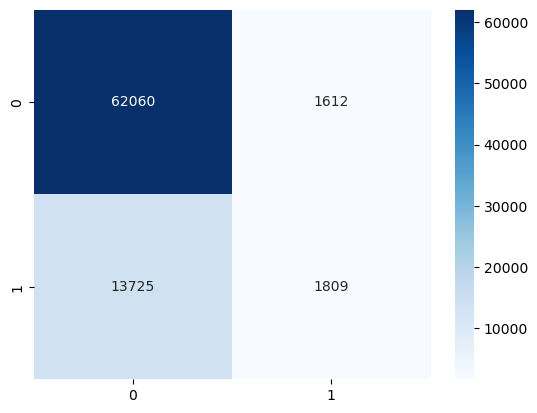

In [29]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 

# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)

# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
print(cm)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives

sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')

In [31]:
# Score
# Fraction of (overall) correctly predicted classes
print("Score: ", accuracy_score(Y_test , y_prediction))

# Precision 
# Accuracy of a positive (’default’) prediction. 
# ”When a positive value is predicted, how often is the prediction correct?”
print("Precision: ", precision_score(Y_test , y_prediction))

# Specificity
# Fraction of correctly predicted ’positives’ (e.g. ’defaults’)
# ”When the actual value is positive, how often is the prediction correct?”
print("Specificity: ", TN / (TN + FP))

# Recall (Sensitivity)
# Fraction of correctly predicted ’positives’ (e.g. ’defaults’)
#  ”When the actual value is positive, how often is the prediction correct?”
print("Recall: ", recall_score(Y_test , y_prediction))

# F Score
# Evaluate the accuracy of predictions in two-class (binary) classification problems
# It combines Precision and Recall (aka Sensitivity) in one metric and tells us something about the relations between data’s positive labels and those given by a classifier
print("F-Score: ", f1_score(Y_test , y_prediction))

# Classification Report
print(classification_report(Y_test , y_prediction))

Score:  0.8063656793677246
Precision:  0.5287927506577025
Specificity:  0.9746827490890816
Recall:  0.11645422943221322
F-Score:  0.19087312054866792
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89     63672
         1.0       0.53      0.12      0.19     15534

    accuracy                           0.81     79206
   macro avg       0.67      0.55      0.54     79206
weighted avg       0.76      0.81      0.75     79206



AUC:  0.4092646535931739


Text(0.5, 1.0, '2-class Precision-Recall curve: \n AUC=0.41')

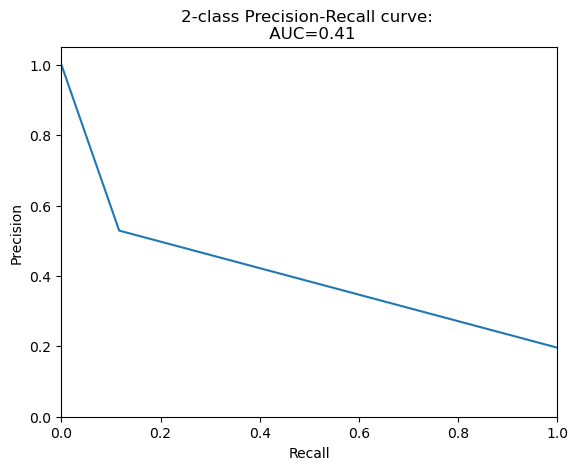

In [32]:
## Precision-Recall Curve 
# How precision and recall varies given different level of thresholds
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)

## AUC
# The bigger the AUC, the better the classifier
prec_recall_auc = auc(recall , precision)
print("AUC: ", prec_recall_auc)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title("2-class Precision-Recall curve: \n AUC={0:0.2f}".format(prec_recall_auc))
#plt.title("Precision-Recall Curve")




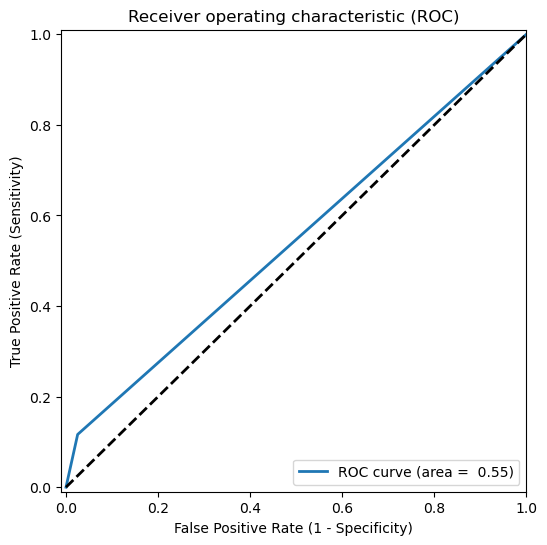

In [33]:
## ROC Curve
# Relationship between sensitivity and specificity of a binary classifier
# The ROC curve serves to visualize a variation of that trade-off. It varies the cut-off threshold from 0 to 1 and calculates 
# for each threshold the true positive rate (aka sensitivity) and false positive rate (equals 1 - specificity)
fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)

plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title("Receiver operating characteristic (ROC)", fontsize=12)
plt.legend(loc="lower right")